In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [4]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [5]:
def feature_derivative(errors, feature):
    # Assume that errors and feature are both numpy arrays of the same length (number of data points)
    # compute twice the dot product of these vectors as 'derivative' and return the value
    derivative = 2*np.dot(errors,feature)
    return(derivative)

In [58]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant == True:
        derivative = 2*np.dot(errors,feature)
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2*np.dot(errors,feature) + 2*l2_penalty*weight
    return derivative

In [7]:
df_train = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict)
df_test = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict)

In [8]:
print df_train.shape, df_test.shape

(17384, 21) (4229, 21)


In [9]:
df_train['constant'] = 1

Test Derivative Function

In [12]:
example_features = df_train[['constant','sqft_living']].values
example_output = df_train['price'].values
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

-4.55328923355e+13
-4.55328923355e+13

-18029479492.0
-18029479492.0


In [13]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False 
    weights = np.array(initial_weights) # make sure it's a numpy array
    while not converged:
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        errors = predictions - output
        gradient_sum_squares = 0 # initialize the gradient sum of squares
        # while we haven't reached the tolerance yet, update each feature's weight
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
            # compute the derivative for weight[i]:
            derivative = feature_derivative(errors, feature_matrix[:,i])
            # add the squared value of the derivative to the gradient sum of squares (for assessing convergence)
            gradient_sum_squares += derivative**2
            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i] - step_size*derivative
        # compute the square-root of the gradient sum of squares to get the gradient matnigude:
        gradient_magnitude = sqrt(gradient_sum_squares)
        if gradient_magnitude < tolerance:
            converged = True
    return(weights)

In [59]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    iteration = 1
    #while not reached maximum number of iterations:
    while iteration < max_iterations:
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        errors = predictions - output
        
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if i == 0:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, False)
            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i] - step_size*derivative
            
        iteration += 1
        
    return weights

In [60]:
df_test['constant'] = 1

In [61]:
simple_feature_matrix = df_train[['constant','sqft_living']].values
output = df_train['price'].values
simple_test_feature_matrix = df_test[['constant','sqft_living']].values
test_output = df_test['price'].values

initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [75]:
l2_penalty = 0.0
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, \
                                                             step_size, l2_penalty, max_iterations)
l2_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, \
                                                             step_size, l2_penalty, max_iterations)

In [76]:
print simple_weights_0_penalty
print simple_weights_high_penalty

[ -1.62844700e-01   2.63024369e+02]
[   9.75756033  124.57217753]


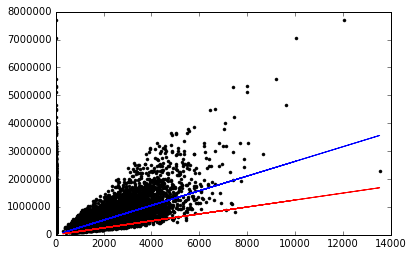

In [77]:
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

Compute the RSS on the TEST data for the following three sets of weights:

    The initial weights (all zeros)
    The weights learned with no regularization
    The weights learned with high regularization

Which weights perform best?


In [78]:
print sum((predict_output(simple_test_feature_matrix, initial_weights) - test_output)**2)
print sum((predict_output(simple_test_feature_matrix, simple_weights_0_penalty) - test_output)**2)
print sum((predict_output(simple_test_feature_matrix, simple_weights_high_penalty) - test_output)**2)

1.78427328614e+15
2.75723632164e+14
6.946421137e+14


In [79]:
print ((predict_output(simple_test_feature_matrix, initial_weights) - test_output)**2).sum()
print ((predict_output(simple_test_feature_matrix, simple_weights_0_penalty) - test_output)**2).sum()
print ((predict_output(simple_test_feature_matrix, simple_weights_high_penalty) - test_output)**2).sum()

1.78427328614e+15
2.75723632164e+14
6.946421137e+14


In [80]:
from sklearn import linear_model

In [81]:
X_train = df_train[['sqft_living']].values
y_train = df_train['price'].values

X_test = df_test[['sqft_living']].values
y_test = df_test[['price']].values

ridge_regr = linear_model.Ridge(alpha=0.0, normalize=True, max_iter=100)
ridge_regr.fit(X_train, y_train)

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [82]:
print('Coefficients: \n', ridge_regr.coef_)
print ('Intercept: ', ridge_regr.intercept_)

('Coefficients: \n', array([ 281.95883963]))
('Intercept: ', -47116.079072903143)


In [83]:
print ((ridge_regr.predict(X_test) - y_test)**2).sum()

3.43675447333e+18


In [84]:
ridge_regr = linear_model.Ridge(alpha=1e11, normalize=True, max_iter=1000)
ridge_regr.fit(X_train, y_train)

Ridge(alpha=1e+11, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [85]:
print('Coefficients: \n', ridge_regr.coef_)
print ('Intercept: ', ridge_regr.intercept_)

('Coefficients: \n', array([  2.81958840e-09]))
('Intercept: ', 539366.62792786735)


In [86]:
print ((ridge_regr.predict(X_test) - y_test)**2).sum()

2.27167565468e+18


In [87]:
multiple_feature_matrix = df_train[['constant','sqft_living','sqft_living15']].values
output = df_train['price'].values
multiple_test_feature_matrix = df_test[['constant','sqft_living','sqft_living15']].values
test_output = df_test['price'].values

initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations=1000


In [88]:
l2_penalty = 0.0
multiple_weights_0_penalty = ridge_regression_gradient_descent(multiple_feature_matrix, output, initial_weights, \
                                                             step_size, l2_penalty, max_iterations)
l2_penalty = 1e11
multiple_weights_high_penalty = ridge_regression_gradient_descent(multiple_feature_matrix, output, initial_weights, \
                                                             step_size, l2_penalty, max_iterations)

In [90]:
print multiple_weights_0_penalty
print multiple_weights_high_penalty

[  -0.35706251  243.05260393   22.41651518]
[  6.73624566  91.48927454  78.43658857]


Compute the RSS on the TEST data for the following three sets of weights:

The initial weights (all zeros)
The weights learned with no regularization
The weights learned with high regularization

Which weights perform best?


In [91]:
print sum((predict_output(multiple_test_feature_matrix, initial_weights) - test_output)**2)
print sum((predict_output(multiple_test_feature_matrix, multiple_weights_0_penalty) - test_output)**2)
print sum((predict_output(multiple_test_feature_matrix, multiple_weights_high_penalty) - test_output)**2)

1.78427328614e+15
2.74067539412e+14
5.00404804222e+14


In [93]:
#Predict first house
print predict_output(multiple_test_feature_matrix[0], multiple_weights_0_penalty), test_output[0]
print predict_output(multiple_test_feature_matrix[0], multiple_weights_high_penalty), test_output[0]

387466.263574 310000.0
270453.526497 310000.0


In [94]:
print predict_output(multiple_test_feature_matrix[0], multiple_weights_0_penalty) - test_output[0]
print predict_output(multiple_test_feature_matrix[0], multiple_weights_high_penalty) - test_output[0]

77466.2635739
-39546.4735029
